# **Practical Assignment 2 - Explainable Artificial Intelligence**

- Catarina Monteiro up202105279
- Diogo Mendes up202108102
- Gonçalo Brochado up202106090

This project aims to analyze and compare the insights offered by various Explainable Artificial Intelligence (XAI) techniques in the context of supervised learning on tabular data. Specifically, we focus on the "Airline Passenger Satisfaction" dataset (DS3), which involves predicting passenger satisfaction based on diverse features such as flight experience, service quality, and demographic information.

The analysis follows a structured methodology, beginning with pre-modeling feature importance assessment to understand the primary factors influencing passenger satisfaction. Subsequently, we train interpretable "glass-box" models and evaluate their intrinsic explanations. Additionally, black-box models are developed and analyzed using post-hoc XAI methods, including simplification-based, feature-based, and example-based techniques.

Through this study, we aim to evaluate the consistency and reliability of different XAI approaches while discussing their strengths and limitations in providing actionable insights into the model's decision-making process. The ultimate goal is to enhance the interpretability of machine learning models in the airline industry, facilitating better decision-making and improving customer satisfaction strategies. 

## **Dependencies**

In [2]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: Could not find a version that satisfies the requirement torch==2.3.1+cu121 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==2.3.1+cu121
You should consider upgrading via the 'C:\Users\UTILIZADOR\OneDrive - Universidade do Porto\1ano_MIA\TAAC\Trabalho2_XAI\Xai\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.inspection import PartialDependenceDisplay
import shap
from alibi.explainers import AnchorTabular
from wordcloud import WordCloud

## **Task 1: Dataset and Learning Task**

In Task 1, the focus is on defining the case study and initiating the machine learning process. For this project, the "Airline Passenger Satisfaction" dataset (DS3) was selected, which involves predicting passenger satisfaction based on a variety of features, including flight service quality, in-flight entertainment, and demographic attributes.

The first step involved conducting a pre-modeling analysis using Explainable Artificial Intelligence (XAI) techniques. This analysis helped to identify the most important features influencing passenger satisfaction. Feature importance rankings provide insights into which aspects of the passenger experience are most predictive of satisfaction, enabling a better understanding of the problem domain before model training.

Initial machine learning models were then trained to establish a baseline performance, serving as the foundation for further analysis in subsequent tasks.

In [4]:
df = pd.read_csv("airline_passenger_satisfaction.csv") # Load the data

In [5]:
df.head() # Display the first 5 rows of the data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.drop_duplicates(inplace=True) # Drop duplicates

In [7]:
df.info() # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [8]:
df = df.dropna() # Drop missing values

In [9]:
df.describe() # Display the summary statistics of the data

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Display the distribution of the target variable
for column in df.columns:
    print(f"Count of unique values in the column {column}:")
    print(df[column].unique())
    print()

Count of unique values in the column ID:
[     1      2      3 ... 129878 129879 129880]

Count of unique values in the column Gender:
['Male' 'Female']

Count of unique values in the column Age:
[48 35 41 50 49 43 60 38 28 27 24  9 52 70 61 11 42 14 56 77 51 47 58 40
 21 33 39 54 46 45 23 20 44 37 36 57 31 53 25 55 72 19 65 32 80  7 34 18
 12 26 17 66 68 67 59 69 16 22 64 29 10 71 30 62 63  8 15 73 78 74 79 13
 76 75 85]

Count of unique values in the column Customer Type:
['First-time' 'Returning']

Count of unique values in the column Type of Travel:
['Business' 'Personal']

Count of unique values in the column Class:
['Business' 'Economy' 'Economy Plus']

Count of unique values in the column Flight Distance:
[ 821  853 1905 ... 1019 1161 1051]

Count of unique values in the column Departure Delay:
[   2   26    0   13   20   16   68    4   12    6   22   23   59   30
   29   40    1   19  151    7   10  324   50   45  254   72  101   18
   27   96   60  104   32   11  183   38    3

In [11]:
# Encode categorical columns
df_encoded = df.copy()

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

df = df_encoded
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [12]:
# Standardize the Age and Flight Distance columns
scaler = StandardScaler()
df[['Age', 'Flight Distance']] = scaler.fit_transform(df[['Age', 'Flight Distance']])
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,0.566973,0,0,0,-0.370115,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,-0.292955,1,0,0,-0.370115,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,0.103935,1,0,0,-0.338036,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,0.699270,1,0,0,0.716540,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,0.633122,1,0,0,2.285372,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


### **Pre-Modelling XAI Techniques**

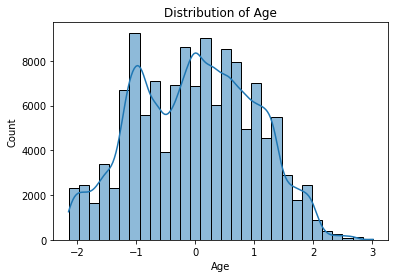

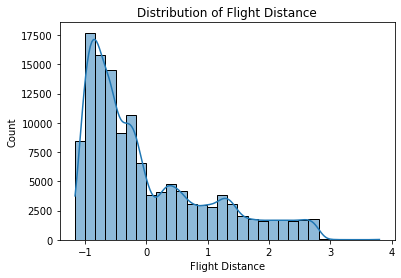

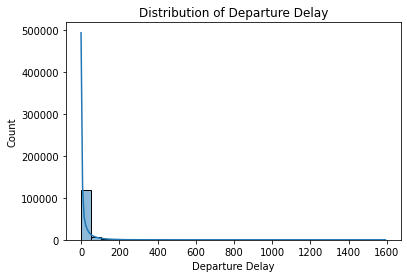

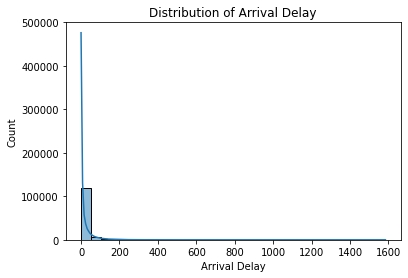

In [13]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

for col in numeric_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


**Distribution of Age:**
It displays noticeable peak in the center, indicating a concentration of values around a central point. The distribution appears to be slightly skewed to the right, with a long tail on the higher end, suggesting that there may be some outliers or extreme values.

**Distribution of Departure Delay:**
The data is highly skewed to the right, with most values concentrated around zero and very few high values.

**Distribution of Arrival Delay:**
Similar to the Departure Delay, the distribution is extremely right-skewed, showing a large spike near zero with minimal spread.

**Distribution of Flight Distance:**
The distribution is broader and shows multiple peaks, indicating a multimodal pattern with varying frequency across the range of values.

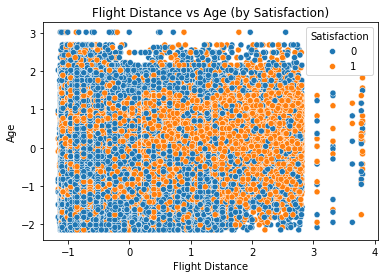

In [14]:
sns.scatterplot(data=df, x='Flight Distance', y='Age', hue='Satisfaction')
plt.title('Flight Distance vs Age (by Satisfaction)')
plt.show()

The plot shows no clear relationship between flight distance, age, and satisfaction levels. Most data points cluster between normalized flight distances of -1 and 2, with satisfaction evenly distributed. At extreme flight distances, satisfied passengers are slightly more prevalent, suggesting longer flights may positively influence satisfaction. Age has no significant impact, indicating satisfaction is driven by other factors like service quality or delays.

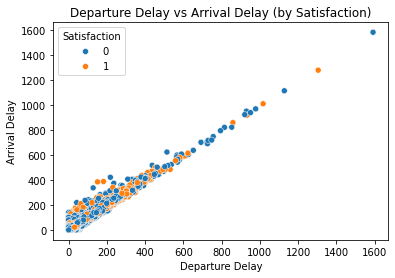

In [15]:
sns.scatterplot(data=df, x='Departure Delay', y='Arrival Delay', hue='Satisfaction')
plt.title('Departure Delay vs Arrival Delay (by Satisfaction)')
plt.show()

The data points align approximately along a straight line extending from the lower left to the upper right, indicating that the relationship between arrival time delay and departure time delay can be reasonably approximated as linear.

This result is both logical and intuitive. If an airline flight experiences a departure delay, it is expected that the arrival will be delayed by a similar duration, assuming the aircraft does not significantly accelerate during the flight to recover the lost time. This linear relationship reflects the direct impact of departure delays on arrival schedules in typical flight operations.

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


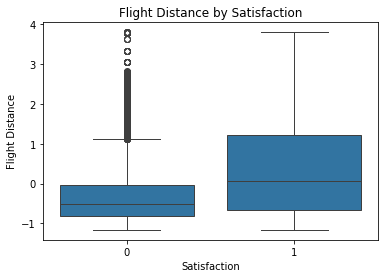

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


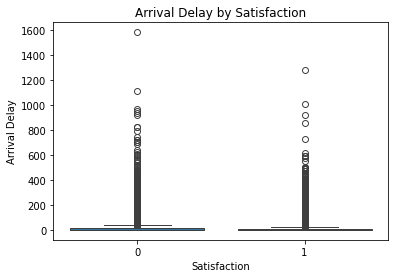

In [16]:
sns.boxplot(data=df, x='Satisfaction', y='Flight Distance')
plt.title('Flight Distance by Satisfaction')
plt.show()

sns.boxplot(data=df, x='Satisfaction', y='Arrival Delay')
plt.title('Arrival Delay by Satisfaction')
plt.show()

In the first plot compares the distribution of flight distances for two satisfaction levels: neutral or dissatisfied (0) and satisfied (1). It can be observed that satisfied passengers (1) generally exhibit longer flight distances, with a higher median and a larger spread of values. Conversely, neutral or dissatisfied passengers (0) are concentrated around shorter flight distances, as indicated by the lower median and reduced variability. 

The second plot illustrating the relationship between arrival delays and satisfaction. Both satisfied (1) and neutral or dissatisfied (0) passengers exhibit a similar distribution of arrival delays, with most values concentrated close to zero. However, there are clear outliers with substantial delays exceeding 800 or even 1,600 units of time. These extreme delays are likely to disproportionately affect passenger satisfaction. While the central tendency of delays remains consistent across both satisfaction groups, the presence of severe delays, particularly among dissatisfied passengers, emphasizes that punctuality is a critical factor in shaping passenger perceptions.

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


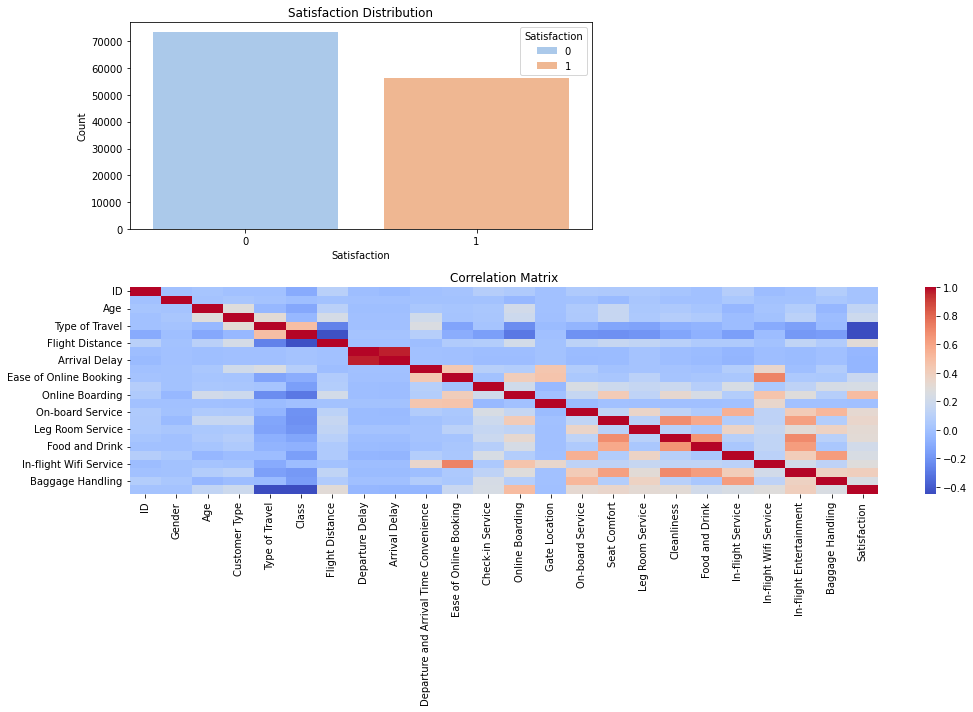

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="Satisfaction", data=df, hue="Satisfaction", palette="pastel")
plt.title("Satisfaction Distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Count")

plt.subplot(2, 1, 2)
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

**Target Variable Distribution (Satisfaction):**
The majority of passengers fall into the "Neutral or Dissatisfied" category, indicating a slight imbalance in the target variable.

**Age Distribution:**
Most passengers are between 20 and 50 years old, with a noticeable peak around the age of 40.

**Correlation Among Continuous Variables:**
Some notable correlations are observed, such as between Departure Delay and Arrival Delay. Additionally, variables related to in-flight services show strong correlations with each other.

In [18]:
correlation_matrix = df.corr()

# Select column pairs with correlation greater than 0.8 or less than -0.8
threshold = 0.6
high_correlation_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.index[i]
            col2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            high_correlation_pairs.append((col1, col2, correlation_value))

print("Highly correlated column pairs (>|0.8|):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated column pairs (>|0.8|):
Departure Delay and Arrival Delay: correlation = 0.97
Ease of Online Booking and In-flight Wifi Service: correlation = 0.71
Seat Comfort and Cleanliness: correlation = 0.68
Seat Comfort and In-flight Entertainment: correlation = 0.61
Cleanliness and Food and Drink: correlation = 0.66
Cleanliness and In-flight Entertainment: correlation = 0.69
Food and Drink and In-flight Entertainment: correlation = 0.62
In-flight Service and Baggage Handling: correlation = 0.63


 Given the large number of features and the patterns observed in the correlation matrix, we identified some columns with high correlations. To simplify the models and reduce information redundancy, we decided to remove the following features: **Departure Delay**, **In-flight Wifi Service**, and **Cleanliness**. This approach aims to create more streamlined models without compromising their predictive performance.

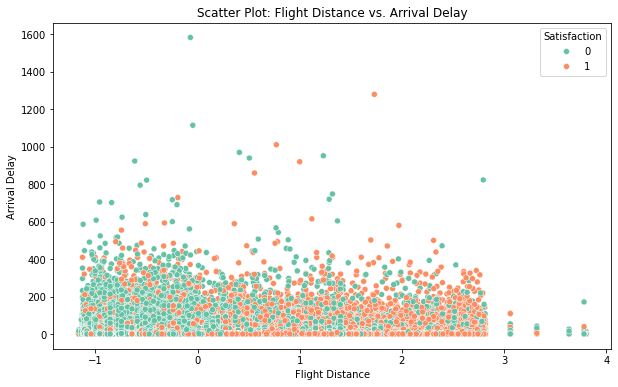

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Flight Distance",
    y="Arrival Delay",
    hue="Satisfaction",
    palette="Set2"
)
plt.title("Scatter Plot: Flight Distance vs. Arrival Delay")
plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay")
plt.legend(title="Satisfaction")
plt.show()

The scatter plot above illustrates the relationship between Flight Distance and Arrival Delay, with the data points colored based on passenger satisfaction levels. 

1. **Linear Relationship**: There is a noticeable linear relationship between Flight Distance and Arrival Delay. As the flight distance increases, the arrival delay also tends to increase. This is logical as longer flights have a higher probability of encountering delays.

2. **Satisfaction Levels**: The color coding of the data points indicates the satisfaction levels of passengers. It is evident that passengers who experienced shorter flight distances and lower arrival delays are more likely to be satisfied. Conversely, passengers with longer flight distances and higher arrival delays tend to be neutral or dissatisfied.

3. **Clusters of Dissatisfaction**: There are clusters of data points with high arrival delays and long flight distances that are predominantly neutral or dissatisfied. This suggests that significant delays on long flights have a substantial negative impact on passenger satisfaction.

4. **Short Flights**: For shorter flights, even a small delay can lead to dissatisfaction. This indicates that passengers have higher expectations for punctuality on shorter flights.

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Progr

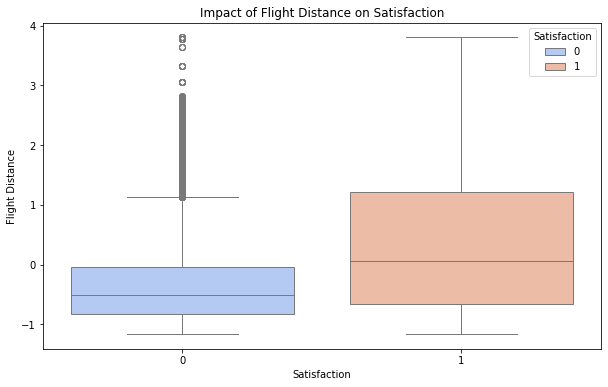

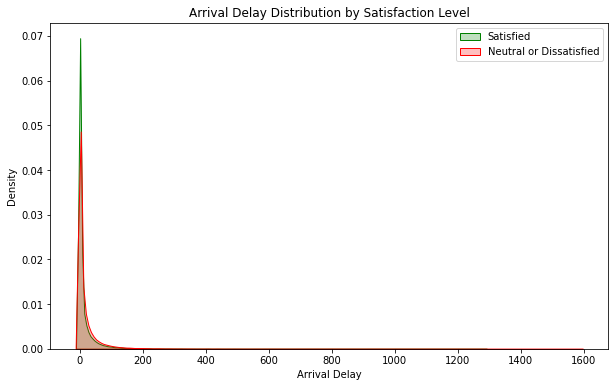

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Satisfaction",
    y="Flight Distance",
    hue="Satisfaction",
    palette="coolwarm"
)
plt.title("Impact of Flight Distance on Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df[df["Satisfaction"] == 1],
    x="Arrival Delay",
    fill=True,
    label="Satisfied",
    color="green"
)
sns.kdeplot(
    data=df[df["Satisfaction"] == 0],
    x="Arrival Delay",
    fill=True,
    label="Neutral or Dissatisfied",
    color="red"
)
plt.title("Arrival Delay Distribution by Satisfaction Level")
plt.xlabel("Arrival Delay")
plt.legend()
plt.show()

The first plot is a boxplot comparing flight distance for two satisfaction levels: satisfied (1) and neutral or dissatisfied (0). It reveals a notable trend—passengers who are satisfied tend to experience longer flight distances, as indicated by the higher median and wider range in the "satisfied" group (brown box). In contrast, neutral or dissatisfied passengers are concentrated around shorter flight distances, as reflected by the lower median and smaller spread in the "neutral/dissatisfied" group (blue box). Outliers in both groups suggest that satisfaction is not strictly dependent on flight distance, but longer flights generally seem to result in higher satisfaction levels, possibly due to enhanced services on long-haul flights.

The second plot presents a density distribution of arrival delays, segmented by satisfaction levels. The green line represents passengers who were satisfied, while the red line corresponds to those who were neutral or dissatisfied. Both distributions are skewed towards shorter delays, with a sharp peak near zero, indicating that most flights had minimal arrival delays. However, the key difference lies in the tail of the distribution—neutral or dissatisfied passengers (red) exhibit a more pronounced density in longer delays, suggesting that significant arrival delays negatively impact satisfaction.

C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\UTILIZADOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

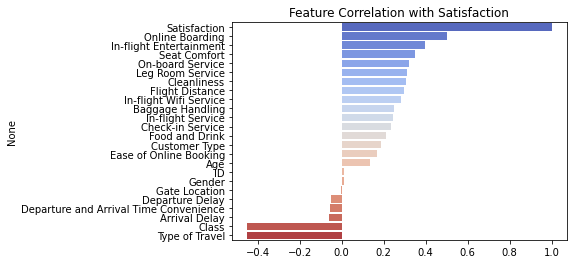

In [23]:
correlation = df.corr()["Satisfaction"].sort_values(ascending=False)
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette="coolwarm")
plt.title("Feature Correlation with Satisfaction")
plt.show()

**High Correlation:**  
- **Online Boarding:** This is the feature most positively correlated with satisfaction, suggesting that an efficient online boarding system significantly enhances passenger satisfaction.  
- **In-flight Entertainment and Seat Comfort:** These variables indicate that onboard experience, such as comfort and entertainment, has a direct impact on positive customer perception.  
- **On-board Service and Leg Room Service:** Aspects of physical comfort and in-flight service are also highly valued by passengers.  
  - **Interpretation:** Factors related to the in-flight experience and digital conveniences are key determinants of high customer satisfaction.  

**Near-Zero Correlation:**  
- **Age, Gender, and ID:** These variables show little correlation with satisfaction, suggesting minimal direct influence.  

**High Negative Correlation:**  
- **Type of Travel and Class:** The class of travel and type of travel (likely business vs. economy) have significant negative correlations with satisfaction. This may indicate that passengers traveling under certain conditions (such as economy class or non-business travel) tend to report lower satisfaction levels.  
- **Arrival Delay and Departure Delay:** Delays exhibit a clear negative correlation with satisfaction, emphasizing that minimizing delays is critical to enhancing the customer experience.  

Based on these analyses, we decided to eliminate the **ID**, **Age**, and **Gender** columns, as their correlation with the target variable is very low.


In [21]:
df2 = df.drop(columns=['ID', 'Age', 'Gender', 'Departure Delay', 'In-flight Wifi Service', 'Cleanliness'])
df2.head()

,Customer Type,Type of Travel,Class,Flight Distance,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Food and Drink,In-flight Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,0,0,0,-0.370115,5.0,3,3,4,3,3,3,5,2,5,5,5,5,0
1,1,0,0,-0.370115,39.0,2,2,3,5,2,5,4,5,3,5,5,5,1
2,1,0,0,-0.338036,0.0,4,4,4,5,4,3,5,3,5,3,3,3,1
3,1,0,0,0.716540,0.0,2,2,3,4,2,5,5,5,4,5,5,5,1
4,1,0,0,2.285372,1.0,3,3,3,5,3,3,4,4,4,3,3,3,1


## **Task 2: In-Modeling Explanations**

**Task 2** involves training an interpretable machine learning model, specifically a glass-box model, and analyzing the explanations it provides. The goal is to understand the decision-making process of the model during the prediction phase.

For this project, we initially chose to use a decision tree due to several key advantages:
- Decision trees are highly interpretable and easy to visualize, especially when compared to more complex models.
- They produce clear and straightforward rules, which facilitate understanding the decision-making process.

This makes decision trees an ideal choice for the task, as they offer valuable insights into how the model arrives at its predictions, ensuring transparency and ease of interpretation.

In [24]:
X = df.drop(['ID','Satisfaction'], axis=1)
y = df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = df2.drop(['Satisfaction'], axis=1)
y = df2['Satisfaction']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)


### **Decision Tree**

In [25]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train2, y_train2)

y_pred2 = tree_model.predict(X_test2)

print("Accuracy 2:", accuracy_score(y_test2, y_pred2))
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Accuracy: 0.90619610265915
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     21951
           1       0.90      0.88      0.89     16896

    accuracy                           0.91     38847
   macro avg       0.91      0.90      0.90     38847
weighted avg       0.91      0.91      0.91     38847

Accuracy 2: 0.8970062038252632
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     21951
           1       0.89      0.87      0.88     16896

    accuracy                           0.90     38847
   macro avg       0.90      0.89      0.90     38847
weighted avg       0.90      0.90      0.90     38847



After removing the columns we considered to be highly correlated, as expected, the performance metrics decreased slightly (by 1%), which is a minimal change. Therefore, we will proceed with the dataset excluding the correlated columns, as we believe this will simplify the interpretability of the models.

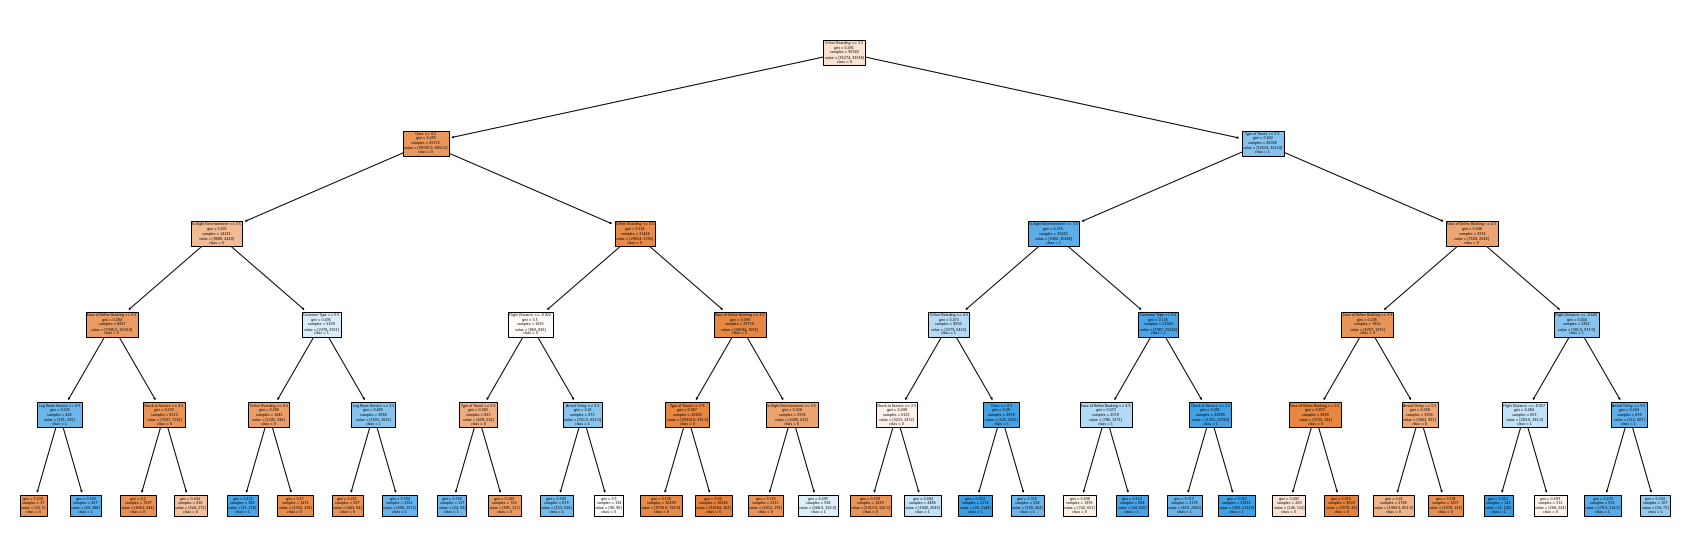

In [26]:
plt.figure(figsize=(30, 10))
plot_tree(
    tree_model, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in tree_model.classes_],
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight") 
plt.show()

**Positive Aspects of Interpretability**

- **Clarity of the Decision Structure:**  
The decision tree is a "glass-box" machine learning technique, meaning its decision-making process is fully transparent. Each node in the tree represents a decision based on a specific feature, and the paths from the root to the leaves illustrate how classifications are made.

- **Ease of Understanding for Humans:**  
The tree is easy to interpret, even for individuals without in-depth knowledge of machine learning. Decisions such as "Online Boarding <= 3.5" at the first node provide an intuitive explanation: the Online Boarding service on the flight has an initial impact on customer satisfaction.

- **Hierarchy of Features:**  
The most important features appear at the higher levels of the tree, indicating their relevance. For example, "Online Boarding," "Type of Travel," and "In-Flight Entertainment" appear early on, suggesting they are the most discriminative variables for predicting satisfaction.

- **Scenario Analysis:**  
The model is useful for exploring different scenarios. For instance, a manager can use this tree to understand how changes in "Online Boarding" or "In-flight Entertainment" affect customer satisfaction.

**Limitations in Interpretability**

- **Tree Complexity:**  
Although visually understandable, the generated tree is relatively large and contains many nodes, making a complete analysis difficult. Deeper trees can lead to overfitting and reduced generalization.

- **Dependence on Binary Splits:**  
The splits are based on simple thresholds, such as <= 0.5. This approach overlooks nonlinear relationships or more complex interactions between features.

- **Possible Feature Redundancy:**  
Features like "In-flight Entertainment" appear multiple times. This may be challenging to explain to a general audience or managers.

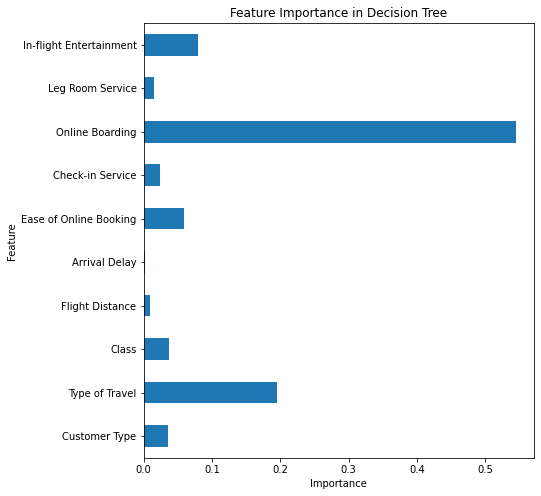

In [27]:
feature_names = df2.columns.drop('Satisfaction').tolist()
importances = pd.Series(tree_model.feature_importances_, index=feature_names)
importances = importances[importances > 0] 
importances.plot(kind='barh',figsize=(7,8))
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

As can be observed in the tree, the feature that stands out is the one that creates the first split (Online Boarding). From there, the importance of the features decreases as we move further down the decision tree. The lower the position of a feature in the tree, the less important it is in predicting the outcome.

## **Task 3: Post-Modeling Explanations**

In Task 3, the focus shifts to post-hoc explainability methods, where the goal is to interpret the behavior of black-box models after they have been trained. Unlike glass-box models, such as decision trees, black-box models do not provide inherent transparency in their decision-making processes. Therefore, post-modeling explanation techniques are applied to gain insights into the model's predictions.

In this task, we will apply various post-hoc XAI techniques to interpret the outputs of the black-box models. These methods include simplification-based, feature-based, and example-based approaches, which allow us to better understand how the model makes its predictions and to assess the consistency and reliability of these explanations.

In [28]:
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y), y=y)
model = XGBClassifier(scale_pos_weight=class_weights[1] / class_weights[0])

In [29]:
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric=["logloss", "auc"],
    use_label_encoder=False,
    random_state=42,
    n_estimators=200,
)

model.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'auc'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
y_pred_xgb = model.predict(X_test2)

print("Accuracy:", accuracy_score(y_test2, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test2, y_pred_xgb))

Accuracy: 0.936237032460679
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     21951
           1       0.94      0.91      0.93     16896

    accuracy                           0.94     38847
   macro avg       0.94      0.93      0.93     38847
weighted avg       0.94      0.94      0.94     38847



### **Post-Hoc XAI Techniques**

#### **Task 3.1: Simplification-Based Technique**

##### **Global Surrogates**

We decided to use this technique due to its ability to provide global interpretability. This method allows us to understand how the XGBoost model is making decisions across the entire dataset, offering insights into the overall decision-making process. Additionally, its flexibility makes it a suitable choice for interpreting complex black-box models like XGBoost.

In [31]:
y_pred_train_xgb = model.predict(X_train2)

surrogate_model = DecisionTreeClassifier(max_depth=4)
surrogate_model.fit(X_train2, y_pred_train_xgb)

y_pred_surrogate = surrogate_model.predict(X_test2)

In [32]:
# R² Score
y_pred_xgb_test = model.predict(X_test2)
r2 = r2_score(y_pred_xgb, y_pred_surrogate)
print(f"R² (fidelity) of the surrogate model: {r2:.4f}")

# Agreement Rate
N = len(y_pred_surrogate)
agreement = np.sum(y_pred_surrogate == y_pred_xgb) / N
print(f"Agreement Rate: {agreement}")

R² (fidelity) of the surrogate model: 0.5903
Agreement Rate: 0.90017247149072


Based on these results, we observe that the **R²** (coefficient of determination—measuring how much of the variance in the black-box model's outcomes is explained by the surrogate model) achieved a value of 0.5903. This indicates that 59% of the variation in the black-box model was captured by the decision tree. While this value is not particularly high, meaning it does not provide complete reliability, the generated decision tree still offers interpretable explanations by reducing complexity, thus bridging the gap between the interpretable model and the underlying black-box model.

Regarding the **Agreement Rate** (the level of agreement between the predictions of the black-box model and the surrogate model), we obtained a value of 0.90. This shows that both models exhibit a high degree of alignment in their decision-making processes. Although the R² value is moderate, the high Agreement Rate highlights that the surrogate model effectively replicates the predictions of the black-box model in absolute terms.

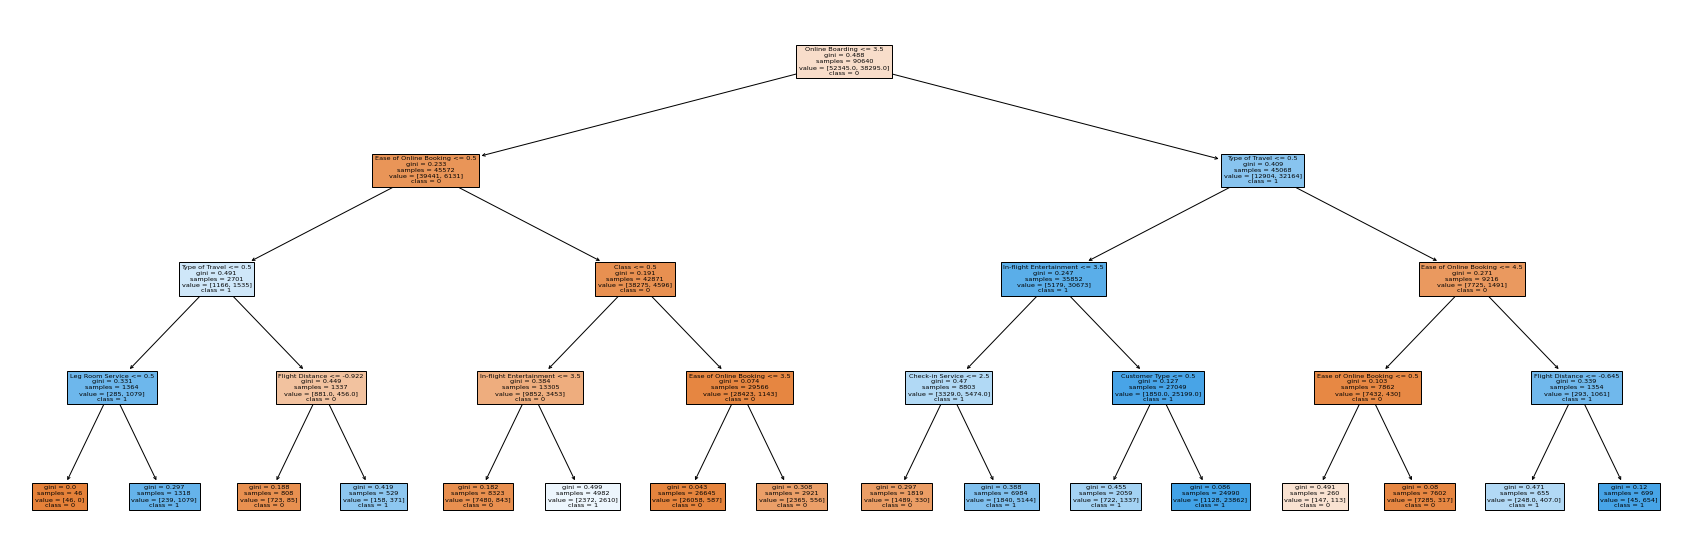

In [33]:
plt.figure(figsize=(30, 10))
plot_tree(
    surrogate_model, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in surrogate_model.classes_], 
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()

#### **Task 3.2 Feature-Based Techniques**

##### **Sensitivity Analysis - Partial Dependence Plots (PDP)**

**Sensitivity Analysis** assesses how the model's predictions change in response to variations in feature values. In this analysis, we will utilize **Partial Dependence Plots (PDP)**. PDPs are useful for visualizing the relationship between a specific feature and the model's predictions, while holding all other features constant. For customer satisfaction, PDPs can help us understand how factors such as flight delays or flight class influence the probability of customer satisfaction.

In [34]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                   Feature  Importance
8                          Online Boarding    0.332918
1                           Type of Travel    0.204284
0                            Customer Type    0.104963
2                                    Class    0.077893
6                   Ease of Online Booking    0.059970
15                 In-flight Entertainment    0.050666
7                         Check-in Service    0.028157
16                        Baggage Handling    0.023936
12                        Leg Room Service    0.022857
11                            Seat Comfort    0.022563
10                        On-board Service    0.019462
14                       In-flight Service    0.019352
13                          Food and Drink    0.007445
4                            Arrival Delay    0.007088
5   Departure and Arrival Time Convenience    0.006762
3                          Flight Distance    0.006728
9                            Gate Location    0.004957


We decided to visualize the 3 most important features.

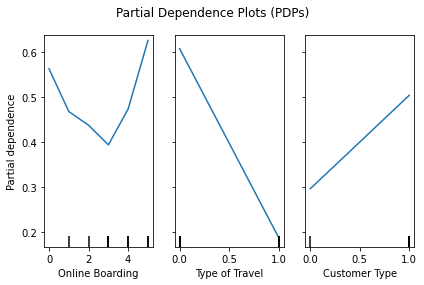

In [35]:
selected_features = [8, 1, 0]  

# Generate PDPs
PartialDependenceDisplay.from_estimator(
    model,
    X_train2,
    selected_features,
    feature_names=feature_names,
    grid_resolution=50,
)

plt.suptitle("Partial Dependence Plots (PDPs)")
plt.tight_layout()
plt.show()

Based on the PDP plots for the 3 most important features, we can observe the following:

- **Online Boarding:**  
The curve suggests that as the value of "Online Boarding" increases, the probability of passenger satisfaction also rises, though with significant variation around certain values. This indicates that online boarding plays an important role in satisfaction predictions, with a noticeable change in behavior at higher values of the variable.

- **Type of Travel:**  
The plot shows a monotonic decrease in the partial dependence between "Type of Travel" and satisfaction. This suggests that business travelers (value 1) tend to be less satisfied than leisure travelers (value 0).

- **Customer Type:**  
The plot reveals a positive relationship between customer type and satisfaction. "Returning" customers are more likely to be satisfied. This suggests that "First Time" customers tend to be less satisfied with the flight experience, potentially due to factors like higher expectations or preferential treatment for "Returning" customers.

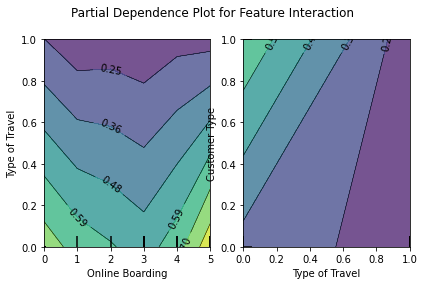

In [36]:
selected_features = [(8, 1),(1, 0)]  

# Generate PDPs
PartialDependenceDisplay.from_estimator(
    model,
    X_train2,
    selected_features, 
    feature_names=feature_names,
    grid_resolution=50,
)

plt.suptitle("Partial Dependence Plot for Feature Interaction")
plt.tight_layout()
plt.show()

For the first plot, which compares **Online Boarding** and **Type of Travel**, we observe a linear relationship between the two variables.  
The second plot, however, reflects a smoother interaction between them. The transition is more stable compared to the first plot.  

For **Returning customers** (Customer Type ≈ 1.0) and those traveling for **business** (Type of Travel ≈ 1.0), the predictions show lower values in the graph. This suggests less variation in the impact of these factors.  

On the other hand, for **First-Time customers** and those traveling for **leisure** (Type of Travel ≈ 0.0), the model indicates a higher impact, likely due to the travel experience being more critical for new customers.

##### **Feature Importance - SHapley Additive exPlanations (SHAP)**

**Feature Importance** involves evaluating and ranking features based on their impact on the model's predictions. **SHAP** (SHapley Additive exPlanations) is widely regarded as one of the most accurate and popular techniques for this task. SHAP quantifies the contribution of each feature to every individual prediction, taking into account all possible feature combinations. In our case, where customer satisfaction predictions depend on multiple factors, SHAP enables us to identify which features have the most significant influence on the model's decisions.

In [37]:
# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train2)

In [38]:
print(shap_values.shape) 

(90640, 17)


In [39]:
print(y_train2.index) # Display the indices of the training data

Index([110885,  28839,  82497,  25514,  73838,   4042,  11212, 101553,  95478,
        61102,
       ...
         6286,  55094,  77085, 110611, 120244, 128492, 104018,    861,  15850,
       122331],
      dtype='int64', length=90640)


In [40]:
indices_satisfied = y_train2[y_train2 == 1].index
indices_dissatisfied = y_train2[y_train2 == 0].index

satisfied_index = indices_satisfied[0]
dissatisfied_index = indices_dissatisfied[0]

print(f"Satisfied passenger index: {satisfied_index}")
print(f"Dissatisfied passenger index: {dissatisfied_index}")

Satisfied passenger index: 28839
Dissatisfied passenger index: 110885


We decided to choose two cases: one where the passenger is satisfied (Satisfied) and another where the passenger is not (Neutral or Dissatisfied).

In [41]:
# SHAP values for a satisfied passenger
instance_index = 28839
instance = X_train2.loc[instance_index]
print(instance)

Customer Type                              1.00000
Type of Travel                             0.00000
Class                                      1.00000
Flight Distance                           -0.21273
Arrival Delay                             11.00000
Departure and Arrival Time Convenience     4.00000
Ease of Online Booking                     3.00000
Check-in Service                           1.00000
Online Boarding                            4.00000
Gate Location                              4.00000
On-board Service                           2.00000
Seat Comfort                               3.00000
Leg Room Service                           4.00000
Food and Drink                             3.00000
In-flight Service                          2.00000
In-flight Entertainment                    3.00000
Baggage Handling                           2.00000
Name: 28839, dtype: float64


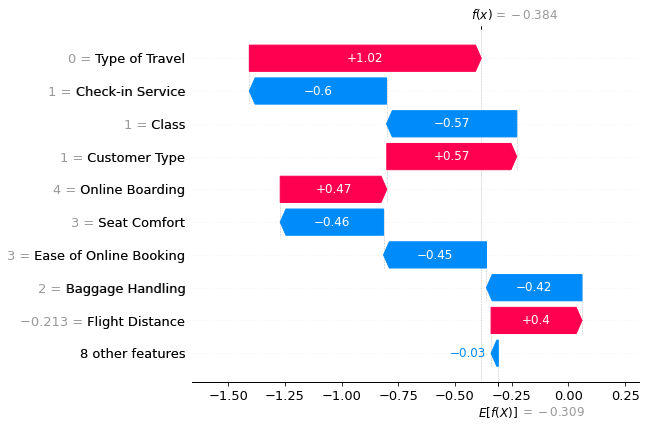

In [42]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[1],
        base_values=explainer.expected_value, 
        data=instance.values,  
        feature_names=feature_names  
    )
)

In this graph, we can observe the importance of each feature for this evaluation, specifically for the "Satisfied" case. We see that **Type of Travel** and **Customer Type** have a significant positive impact. On the other hand, a low rating for the **Check-In service** negatively contributed, indicating dissatisfaction with this aspect, as did the **Class** feature.  

This graph is easy to interpret, allowing for a clear explanation of why the model classified this opinion as "Satisfied."

In [43]:
# SHAP values for a dissatisfied passenger
instance_index = 110885
instance = X_train2.loc[instance_index]
print(instance)

Customer Type                             1.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           1.287936
Arrival Delay                             0.000000
Departure and Arrival Time Convenience    2.000000
Ease of Online Booking                    2.000000
Check-in Service                          1.000000
Online Boarding                           4.000000
Gate Location                             2.000000
On-board Service                          3.000000
Seat Comfort                              3.000000
Leg Room Service                          3.000000
Food and Drink                            2.000000
In-flight Service                         3.000000
In-flight Entertainment                   3.000000
Baggage Handling                          3.000000
Name: 110885, dtype: float64


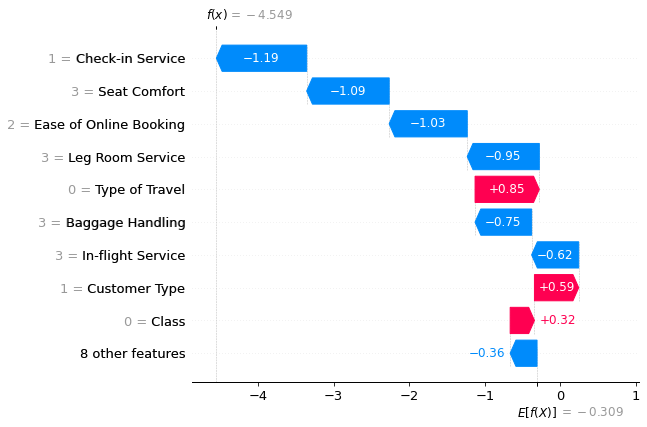

In [44]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=instance.values,  
        feature_names=feature_names 
    )
)

In this case, we can observe that most of the features have a high negative impact, which results in the classification of the opinion as "Neutral or Dissatisfied." Upon closer inspection of the graph, we can identify that **Check-In Service**, **Seat Comfort**, and **Ease of Booking** had a negative weight, which contributed to this classification.

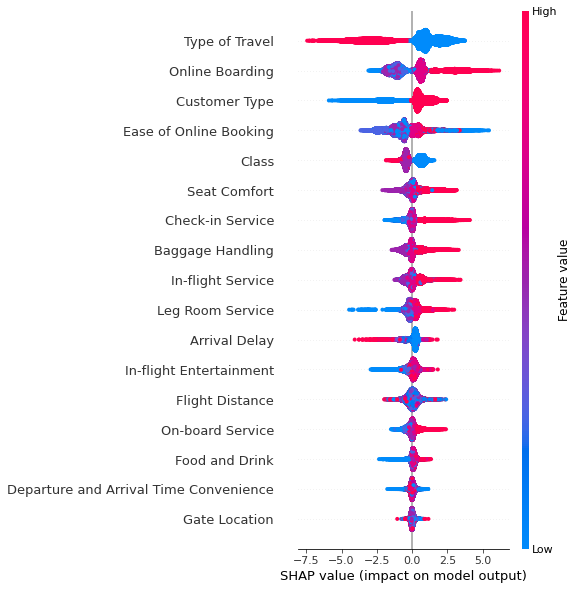

In [45]:
shap.summary_plot(shap_values, X_train2)

In this graph, we can observe the features ranked by importance, from the most impactful (top) to the least impactful (bottom), along with their respective SHAP values. These values indicate the impact of each feature on the model's output. Positive values increase the prediction (higher probability of satisfaction), while negative values decrease the prediction (lower probability of satisfaction).

We can see that **Type of Travel**, **Online Boarding**, **Customer Type**, and **Ease of Online Booking** are the most important variables for passenger satisfaction. This suggests that the digital experience and the context of travel are critical factors.  

We performed a deeper analysis of each of these features:

- **Type of Travel:**  
The primary variable in the model, showing a significant positive impact for business trips (high SHAP values).

- **Online Boarding:**  
High values (smooth online boarding) increase satisfaction, while issues in the process negatively affect it.

- **Customer Type:**  
Frequent passengers show higher levels of satisfaction, reinforcing the importance of customer retention and loyalty.

- **Ease of Online Booking:**  
Ease in the online booking process is positively correlated with satisfaction, emphasizing the need for intuitive and reliable systems.

#### **Task 3.3 Example-Based Technique**

##### **Anchors**

It is an explainability technique that provides local explanations for model predictions by identifying a subset of features from the dataset that, when present, guarantee a specific prediction. In the context of predicting passenger satisfaction, Anchors offers a straightforward and intuitive approach to understanding which variables—such as flight delays or flight class—have the most influence on whether a passenger is classified as satisfied or dissatisfied.

In [46]:
# Anchor Explanations
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

category_map = {
    i: df[col].unique().tolist() for i, col in enumerate(df.columns) if col in categorical_columns
}
predictor = lambda x: model.predict(x) 

In [47]:
explainer = AnchorTabular(predictor, feature_names, categorical_names=category_map, seed=1) # Initialize the explainer

In [48]:
# Fit the explainer
X_train2_array = X_train2.to_numpy()
explainer.fit(X_train2_array, disc_perc=[25, 50, 75])

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': [25, 50, 75]},
  'version': '0.9.6'}
)

In [49]:
# Select a sample to explain
sample_to_explain = X_test2.iloc[0].to_numpy().reshape(1, -1)

explanation = explainer.explain(sample_to_explain)

print("Anchor:", explanation.anchor)
print("Precision:", explanation.precision)
print("Coverage:", explanation.coverage)

Anchor: ['Leg Room Service <= 2.00', 'Online Boarding <= 3.00', 'On-board Service <= 2.00']
Precision: 0.9528158295281582
Coverage: 0.076


The **Anchor** indicates that the model's accuracy is 0.95, e.g. 95.2% of the samples that meet the anchor conditions are correctly classified by the model, which demonstrates a reliable explanation for the subset of data covered. The coverage is 0.076, which means that only 7.60% of the examples in the database are explained by this anchor.

The Anchor describes three conditions of dissatisfaction with services: **“Check-in Service <= 4.00”**, **“Online Boarding <= 3.00”** and **“On-board Service <= 2.00”**, which are determining factors for the model to classify an example as dissatisfied. The explanation is simple and easy to interpret, but the low coverage suggests that it would be interesting to explore other examples to see if the same conditions apply to more instances or to adjust the parameters to increase coverage without compromising accuracy.

## **Task 4 - Quality of the Explanations**

To assess the quality of the explanations, we decided to use the 'Comprehensibility / Simplicity / Sparsity' metric, because in this use case, one of the main objectives is to understand how the model works and to be able to explain its evaluations to people outside the field.

In the case of the SHAP model, we identified how many features have significant SHAP values (not close to zero). We found that 4 features are highly significant, while another 6 are somewhat significant. The remaining 5 are not very significant. For this case, we can consider that the model is understandable.

With regard to **Global Surrogate**, we evaluated the size and complexity of the tree generated.  
**Decision Tree:**
- **Depth:** 4
- **Complete**

As we can see, this tree is not excessively complex, but it is not excessively simple either. With careful analysis, it is possible to interpret it and draw explanations and conclusions. However, it may not be a very simple way to present explanations to people outside the field.

Finally, in the case of **Anchor**, the explanation provided presents a set of three conditions (“Check-in Service <= 4.00”, “Online Boarding <= 3.00” and “On-board Service <= 2.00”), which contributes to a clear and easily understandable explanation, as it uses only intuitive variables directly associated with the model's behavior. However, although the explanation is simple and clear, the low coverage observed (7.60%) indicates that the explanation does not apply to a significant portion of the data, which may be a limitation.

## Bibliography

https://towardsdatascience.com/explainable-ai-xai-methods-part-5-global-surrogate-models-9c228d27e13a

Doshi-Velez, F., & Kim, B. (2017). Towards a rigorous science of interpretable machine learning. arXiv preprint arXiv:1702.08608.

Molnar, C. (2022). Interpretable Machine Learning: A Guide for Making Black Box Models Explainable. Leanpub.

Ali, S., Abuhmed, T., El-Sappagh, S., Muhammad, K., Alonso-Moral, J. M., Confalonieri, R., Guidotti, R., Del Ser, J., Díaz-Rodríguez, N., & Herrera, F. (2023). Explainable Artificial Intelligence (XAI): What we know and what is left to attain Trustworthy Artificial Intelligence. Information Fusion, 99, 101805. https://doi.org/10.1016/j.inffus.2023.101805